In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning Prac/student_scores.csv")
data.head()

,Hours,Scores
0,1.001241,1
1,6.594912,66
2,0.000000,0
3,6.751455,65
4,6.741474,70


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   1000 non-null   float64
 1   Scores  1000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [5]:
data.describe()

,Hours,Scores
count,1000.000000,1000.000000
mean,5.022038,51.128000
std,2.445619,24.442976
min,0.000000,0.000000
25%,3.191095,33.000000
50%,5.067689,51.000000
75%,6.837303,69.000000
max,10.000000,100.000000


In [6]:
x = data[['Hours']]
x.head()

,Hours
0,1.001241
1,6.594912
2,0.000000
3,6.751455
4,6.741474


In [7]:
y = data['Scores']
y.head()

,Scores
0,1
1,66
2,0
3,65
4,70


In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [9]:
model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

m = model.coef_
c = model.intercept_
print(f"m : {model.coef_}")
print(f"c : {model.intercept_}")
print(f"MSE:",mean_squared_error(y_test,y_pred))
print(f"R_2 score:",r2_score(y_test,y_pred))
print(f"RMSE:",root_mean_squared_error(y_test,y_pred))


m : [9.81078695]
c : 1.8297781999375289
MSE: 20.63370312977665
R_2 score: 0.9622432123086325
RMSE: 4.5424336131391785


In [10]:
df = pd.DataFrame({"Predicted":y_pred,"Actual":y_test})
df

,Predicted,Actual
95,36.358165,33
882,23.703741,28
430,53.983163,50
928,78.647516,79
765,47.188321,46
...,...,...
661,1.829778,0
355,62.001118,61
286,81.628992,80
872,37.311589,42


In [15]:
y_hat = m*x_test + c
y_hat.head()

,Hours
95,36.358165
882,23.703741
430,53.983163
928,78.647516
765,47.188321


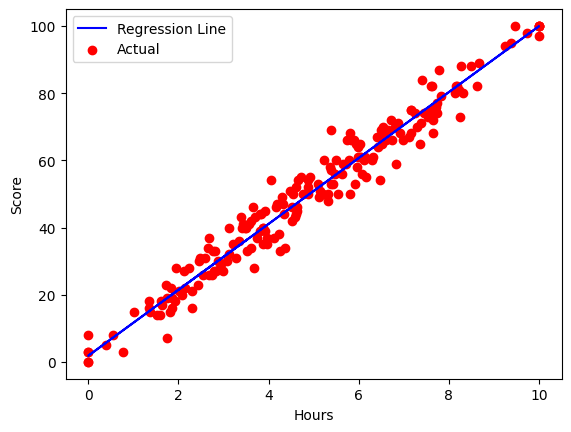

In [14]:
plt.plot(x_test,y_hat,"b-",label="Regression Line")
plt.scatter(x_test,y_test,color="red",label="Actual")
plt.xlabel("Hours")
plt.ylabel("Score")
plt.legend()
plt.show()